In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing the Data

In [2]:
df=pd.read_csv("E:\machine learning\HomeWork2\AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

## EDA

In [4]:
base=['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']
df=df[base]
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,private_room,40.64749,-73.97237,149,1,9,0.21,6,365
1,manhattan,entire_home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,manhattan,private_room,40.80902,-73.94190,150,3,0,NaN,1,365
3,brooklyn,entire_home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,manhattan,entire_home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [5]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df=df.fillna(0)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Question 1: What is the most frequent mode in 'neighbourhood_group' col?

In [7]:
df.neighbourhood_group.value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten_island      373
Name: neighbourhood_group, dtype: int64

## Splitting The Data Using Scikit-Learn

In [8]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

#del df_train['price']
#del df_val['price']
#del df_test['price']

# Question 2: What are the two features that have the biggest correlation in this dataset?

In [11]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
numerical=['latitude',
'longitude',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

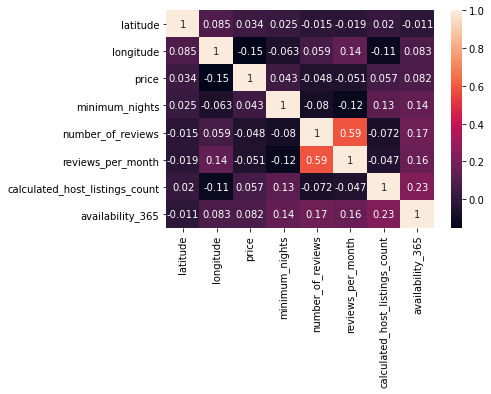

In [13]:
#print(corrMatrix)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Make price binary

In [14]:
df['above_average']=(df['price']>=152).astype(int)

<AxesSubplot:xlabel='above_average', ylabel='Count'>

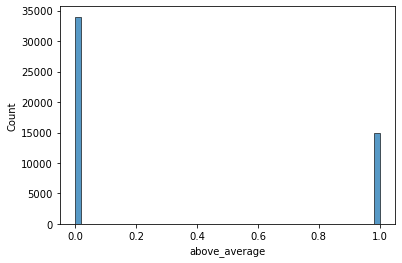

In [15]:
sns.histplot(df.above_average, bins=50)

In [16]:
len(df.above_average)

48895

# Question 3
Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.

Mutual information : concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [17]:
categorical=['neighbourhood_group','room_type']

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df.above_average)

In [20]:
mi = df[categorical].apply(mutual_info_price_score)
mi=mi.sort_values(ascending=False)
round(mi,2)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

# Question 4 : Training Logistic Regression

### One-hot Encoding

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
df_train['above_average']=(df_train['price']>=152).astype(int)
df_val['above_average']=(df_val['price']>=152).astype(int)
df_test['above_average']=(df_test['price']>=152).astype(int)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [25]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [26]:
y_pred = model.predict_proba(X_val)[:, 1]
price_decision = (y_pred >= 0.5)
original_accuracy=(y_val == price_decision).mean()
original_accuracy.round(2)

0.79

# Question 5: Finding The Least Useful Feature Using The Feature Elimination Technique

In [27]:
categorical_numerical=categorical + numerical
categorical_numerical

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [28]:
dicts={}
scores=[]
accuracy=[]
for index,item in enumerate(categorical_numerical):
    categorical_numerical.remove(item)
    
    
    
    train_dict = df_train[categorical_numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[categorical_numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,max_iter=100000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    price_decision = (y_pred >= 0.5)
    scores.append((y_val == price_decision).mean())
    print(item)
    print(scores[index])
    print("original accuracy - excluded feature accuracy={} - {} = {}".format(original_accuracy,scores[index],original_accuracy - scores[index]))
    print()
    accuracy.append(abs(original_accuracy - scores[index]))
    categorical_numerical.insert(index,item)
    
    dicts[item] = accuracy[index]


neighbourhood_group
0.7509970344616014
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7509970344616014 = 0.039881378464055595

room_type
0.7286021065548625
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7286021065548625 = 0.06227630637079451

latitude
0.7869925350240311
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7869925350240311 = 0.003885877901625867

longitude
0.7870947949688107
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7870947949688107 = 0.0037836179568462303

minimum_nights
0.7917987524286737
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7917987524286737 = -0.0009203395030167316

number_of_reviews
0.7915942325391144
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7915942325391144 = -0.0007158196134574579

reviews_per_month
0.7906738930360978
original accuracy - excluded feature accuracy=0.790878412925657 - 0.7906738930360978 = 0.00020451988955916267

In [29]:
accuracy

[0.039881378464055595,
 0.06227630637079451,
 0.003885877901625867,
 0.0037836179568462303,
 0.0009203395030167316,
 0.0007158196134574579,
 0.00020451988955916267,
 0.0012271193373555311,
 0.009612434809285197]

In [30]:
dicts

{'neighbourhood_group': 0.039881378464055595,
 'room_type': 0.06227630637079451,
 'latitude': 0.003885877901625867,
 'longitude': 0.0037836179568462303,
 'minimum_nights': 0.0009203395030167316,
 'number_of_reviews': 0.0007158196134574579,
 'reviews_per_month': 0.00020451988955916267,
 'calculated_host_listings_count': 0.0012271193373555311,
 'availability_365': 0.009612434809285197}

In [31]:
temp = min(dicts.values())
temp

0.00020451988955916267

# Question 6: Using Linear Regression Model instead of Logistic Regression Model

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [33]:
y_train = np.log1p(df_train.price.values)
y_val   = np.log1p(df_val.price.values)
y_test  = np.log1p(df_test.price.values)

train_dict = df_train[categorical_numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val[categorical_numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
    
#X_train=df_train[numerical].values
#X_val=df_val[numerical].values
#X_test=df_test[numerical].values

#del df_train['price']
#del df_val['price']
#del df_test['price']

In [34]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    model=Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    pred_val = model.predict(X_val)
    print(np.sqrt(mean_squared_error(y_val,pred_val)).round(3))


0.497
0.497
0.497
0.497
0.498
